# **Linear Homogenization**

## Scale separation
The goal of the homogenization process is to predict the mechanical behavior of a heterogeneous material using information related to the microstructure.
Let us consider a material with a characteristic size $L$ and a Representative Volume Element (RVE) of a size $l$, which comprises matrix and inclusions of diameter $d$. To homogenize this media and to get the macroscopic behavior, it is necessary to have the scale separation condition:
$$L\ll l\ll d$$

## **Homogenisation methodology**

### Representation
This step consists of the mathematical description of the heterogeneous material.

We will describe:
- Behavior: $$\sigma(x) = C(x):\varepsilon(x)$$
- Inclusion's shape and size
- Volume fraction of each of the phases: $$f^{(r)} = \frac{\Omega^{(r)}}{\Omega}$$
    with $\Omega^{(r)}$ being volume of the phase $r$ and $\Omega$ volume of the RVE.

### Localization

Once the definition of the homogenization problem is well established, we have to obtain the link between the quantities at the microscopic scale $(\boldsymbol{\sigma}, \boldsymbol{\varepsilon})$ and those at the macroscopic scale $(\boldsymbol{\Sigma}, \boldsymbol{E})$.

If we consider a homogeneous stress $\boldsymbol{\Sigma}$ on the RVE boundary, one gets
$$\langle \boldsymbol{\sigma}(x) \rangle = \frac{1}{\Omega} \int_{\Omega} \boldsymbol{\sigma}(x) d\Omega = \boldsymbol{\Sigma} \Leftrightarrow \boldsymbol{\Sigma} = \sum_{r=1}^N f^{(r)} \langle \boldsymbol{\sigma}(x) \rangle^{(r)}$$

If now we consider a homogeneous strain $E$ on the RVE boundary, one gets
$$\langle \boldsymbol{\varepsilon}(x) \rangle = \frac{1}{\Omega} \int_{\Omega} \boldsymbol{\varepsilon}(x) d\Omega = \boldsymbol{E} \Leftrightarrow \boldsymbol{E} = \sum_{r=1}^N f^{(r)} \langle \boldsymbol{\varepsilon}(x) \rangle^{(r)}$$

The localization step mainly aims to define two tensors:

- Strain localization tensor: $\mathbb{A}(x)$
- Stress localization tensor: $\mathbb{B}(x)$

such as

$$\boldsymbol{\varepsilon}(x) = \mathbb{A}(x):\boldsymbol{E}$$
$$\boldsymbol{\sigma}(x) = \mathbb{B}(x):\boldsymbol{\Sigma}$$

### Homogenization

The homogenization step aims to establish the link between $\Sigma$ and $E$.
Thanks to the local behavior and the localization step, we get a relation between the macroscopic stress $\Sigma$ and the macroscopic strain $E$, as
$$\boldsymbol{\Sigma} = \mathbb{C}^{hom}:\boldsymbol{E}$$

nb: If we submit the composite to a uniaxial traction or deformation, one gets
$$\Sigma_1 = E^{hom}E_1 \Rightarrow  E^{hom} = \Sigma_1/E_1$$



# **Objective**

The objective of this exercise is to determine the characteristic size of the inclusions. 
We consider a square with a length $l=1$. 

First, we will consider a composite with only one inclusion with a diameter $d=0.95$. What can we conclude on the stress over the composite?

Second, we are going to consider a fixed volume fraction $f=0.3$ of inclusions and we will change the inclusion diameter. In the simulations, $d=[0.15, 0.1, 0.075, 0.05, 0.025, 0.02]$. What is the good inclusion diameter to consider ?

Finally, we will consider a fixed inclusion diameter and we will change the volume fraction of inclusion. We will consider $f=[0.05, 0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]$. Compute the homogeneous Young modulus $E^{hom}$ and compare the numerical prediction to Voight and Reuss bounds. 

## Importing modules

In [415]:
# loading Akantu
import akantu as aka
#loading numpy (useful for manipulating node/element fields)
import numpy as np
import gmsh

# import the pyplot submodule to draw figures
import matplotlib.pyplot as plt
# import triangluation routine to plot meshes
import matplotlib.tri as tri
# setting a default image size large enough
plt.rcParams['figure.figsize'] = [10, 10]

ModuleNotFoundError: No module named 'akantu'

## Creating a material file for Akantu

In this tutorial we will consider an elastic constitutive law, with a stiffness matching a typical steel. 

The following file *material.dat* descrives such a constitutive law, which we write and then load thanks to *Akantu*'s parsing routines:

In [418]:
material_file = """
material elastic [
    name = matrix
    rho = 7800     # density
    E   = 8e9   # young's modulus
    nu  = 0.3      # poisson's ratio
]

material elastic [
    name = inclusions
    rho = 7800     # density
    E   = 40e9   # young's modulus
    nu  = 0.3      # poisson's ratio
]
"""
# writing the material file
open('material.dat', 'w').write(material_file)
#reading the material file
material_file = 'material.dat'
aka.parseInput(material_file)

NameError: name 'aka' is not defined

## Generating a mesh


Calculated packing density: 0.20
Total number of circles: 408
Sphere 1 is successfully placed after 1 iterations
Sphere 2 is successfully placed after 1 iterations
Sphere 3 is successfully placed after 1 iterations
Sphere 4 is successfully placed after 1 iterations
Sphere 5 is successfully placed after 1 iterations
Sphere 6 is successfully placed after 1 iterations
Sphere 7 is successfully placed after 1 iterations
Sphere 8 is successfully placed after 1 iterations
Sphere 9 is successfully placed after 1 iterations
Sphere 10 is successfully placed after 1 iterations
Sphere 11 is successfully placed after 1 iterations
Sphere 12 is successfully placed after 1 iterations
Sphere 13 is successfully placed after 1 iterations
Sphere 14 is successfully placed after 1 iterations
Sphere 15 is successfully placed after 1 iterations
Sphere 16 is successfully placed after 1 iterations
Sphere 17 is successfully placed after 1 iterations
Sphere 18 is successfully placed after 1 iterations
Sphere 19 i

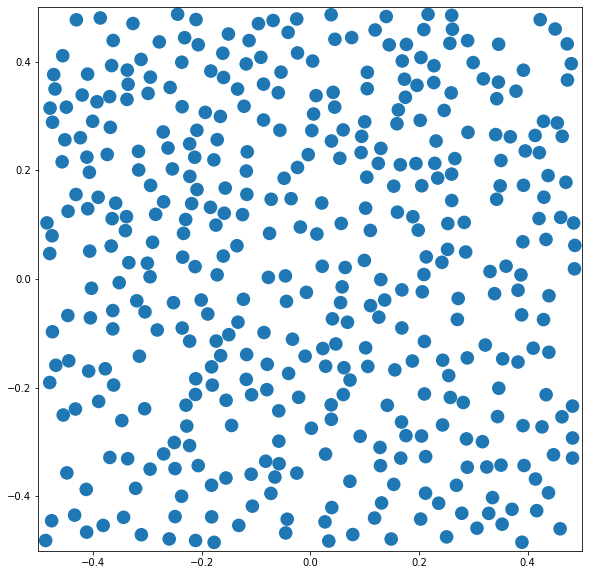

In [419]:
from mesh_generation_composites import gen_mesh, gen_mesh_mult
d_incl = 0.4
min_volume_fraction = 0.3
square_length = 1
#gen_mesh_mult(d_max, d_min, min_volume_fraction, square_length)
gen_mesh(d_incl, min_volume_fraction, square_length)

In [420]:
element_size = 0.005
output_file = 'rve.geo'
import generate_geo_file
generate_geo_file.main(square_length, element_size, output_file)
import subprocess
ret = subprocess.run("gmsh -2 -order 1 -o rve.msh rve.geo", shell=True)
if ret.returncode:
    print("Beware, gmsh could not run: mesh is not regenerated")
else:
    print("Mesh generated")

Info    : Running '/usr/local/bin/gmsh -2 -order 1 -o rve.msh rve.geo' [Gmsh 4.9.4, 1 node, max. 1 thread]
Info    : Started on Wed Apr 13 13:18:58 2022
Info    : Reading 'rve.geo'...
Info    : Done reading 'rve.geo'
Info    : Meshing 1D...
Info    : [  0%] Meshing curve 1 (Line)
Info    : [ 10%] Meshing curve 2 (Line)
Info    : [ 10%] Meshing curve 3 (Line)
Info    : [ 10%] Meshing curve 4 (Line)
Info    : [ 10%] Meshing curve 5 (Circle)
Info    : [ 10%] Meshing curve 6 (Circle)
Info    : [ 10%] Meshing curve 7 (Circle)
Info    : [ 10%] Meshing curve 8 (Circle)
Info    : [ 10%] Meshing curve 9 (Circle)
Info    : [ 10%] Meshing curve 10 (Circle)
Info    : [ 10%] Meshing curve 11 (Circle)
Info    : [ 10%] Meshing curve 12 (Circle)
Info    : [ 10%] Meshing curve 13 (Circle)
Info    : [ 10%] Meshing curve 14 (Circle)
Info    : [ 10%] Meshing curve 15 (Circle)
Info    : [ 10%] Meshing curve 16 (Circle)
Info    : [ 10%] Meshing curve 17 (Circle)
Info    : [ 10%] Meshing curve 18 (Circle)
In

### Getting mesh definition to plot it

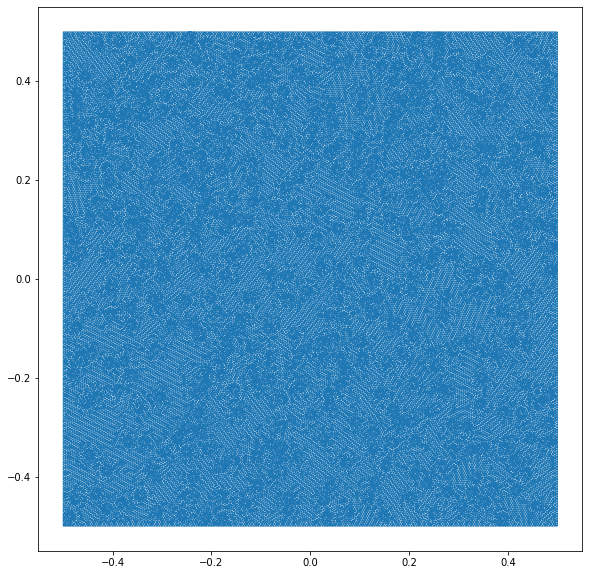

In [421]:
# reading the mesh
dim = 2    
mesh_file = 'rve.msh'
mesh = aka.Mesh(dim)
mesh.read(mesh_file)

# extract the mesh
conn = mesh.getConnectivity(aka._triangle_3)
nodes = mesh.getNodes()
#mesh.makePeriodic(aka._x)

triangles = tri.Triangulation(nodes[:, 0], nodes[:, 1], conn)

# plot the result
plt.axes().set_aspect('equal')
# plots the pristine state
t = plt.triplot(triangles, '--', lw=.8)

## Configuring the Solver

### Creating a *SolidMechanicsModel* model and configuring a static solver

In [422]:
# creating the solid mechanics model
model = aka.SolidMechanicsModel(mesh)

# initialize a static solver

material_selector = aka.MeshDataMaterialSelectorString("physical_names", model)
model.setMaterialSelector(material_selector)

model.initFull(_analysis_method=aka._static)

# configure the linear algebra solver
solver = model.getNonLinearSolver()
solver.set("max_iterations", 100)
solver.set("threshold", 1e-4)
solver.set("convergence_type", aka.SolveConvergenceCriteria.residual)

0


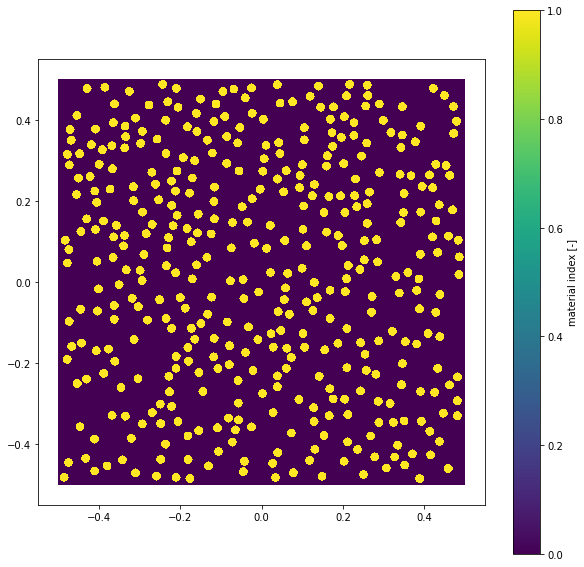

In [423]:
# plot material fields
plt.axes().set_aspect('equal')
material_ids = np.array([material_selector(aka.Element(aka._triangle_3, i)) for i in range(mesh.getNbElement(aka._triangle_3))])
material_tri = plt.tripcolor(triangles, material_ids)
cbar = plt.colorbar(material_tri)
cbar.set_label('material index [-]')

## Declaring boundary conditions

Vertical extension boundary conditions are applied at the top RVE boundary. Macroscopic deformation in vertical direction is taken $\varepsilon=0.1$.

In [424]:
# set the displacement/Dirichlet boundary conditions
model.applyBC(aka.FixedValue(0.1, aka._y), "top")
model.applyBC(aka.FixedValue(0.0, aka._y), "bottom")
model.getBlockedDOFs()[0, aka._x] = True

## Solve the problem and plotting the stress field

Average stress tensor is [-1.82638230e+05 -1.43891129e+05 -1.43891129e+05  4.75430421e+08]


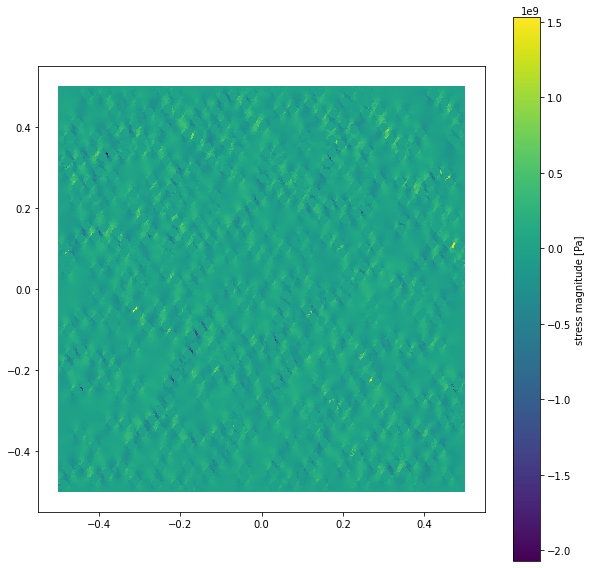

In [425]:
# compute the solution
model.solveStep()

# plot stress field
plt.axes().set_aspect('equal')

mat1_elements = model.getMaterial("matrix").getElementFilter()(aka._triangle_3)
mat2_elements = model.getMaterial("inclusions").getElementFilter()(aka._triangle_3)

mat1 = model.getMaterial("matrix").getStress(aka._triangle_3)
mat2 = model.getMaterial("inclusions").getStress(aka._triangle_3)

field = np.zeros((mesh.getNbElement(aka._triangle_3), 4))
av_stress = np.zeros(4)

for m, i in enumerate(mat1_elements):
    field[i, :] = mat1[m, :]
    av_stress += mat1[m, :]
for m, i in enumerate(mat2_elements):
    field[i, :] = mat2[m, :] 
    av_stress += mat2[m, :]
av_stress /= (len(mat1_elements) + len(mat2_elements))
print(f"Average stress tensor is {av_stress}")

field_tri = plt.tripcolor(triangles, field[:, 1])
cbar = plt.colorbar(field_tri)
cbar.set_label('stress magnitude [Pa]')

Plot the evolution of the Young's modulus with respect to the inclusion diameter.

In [ ]:
d=[0.2, 0.15, 0.1, 0.075, 0.05, 0.025, 0.02]
eps=0.1
E=np.array([])/eps # fill in the homogenized Young's moduli
plt.plot(d, E)
plt.xlabel('inclusion diameter [m]')
plt.ylabel('E [Pa]')
plt.show()

Plot the evolution of the homogenized Young's modulus with respect to the volume fraction and compare it the Voight and Reuss bounds.

In [ ]:
Er=[] # fill in the Reuss values
Ev=[]  # fill in the Voight values
f=[0,0.05,0.1,0.15,0.2,0.25,0.3,0.35,0.4,0.45,0.5]
En = np.array([])/eps # fill in the homogenized Young's moduli

In [ ]:
plt.plot(f, Er, label="Voight")
plt.plot(f, Ev, label="Reuss")
plt.plot(f, En, 'o', label="simulation")
plt.xlabel('f')
plt.ylabel('E [Pa]')
plt.legend()
plt.show()